## Baye's Formula

                                P(A|B) = P(B|A)*P(A) / P(B)

Let's begin with asking the right questions this time  :)

*Before we begin lets introduce some more useful terms : -*

##### Distribution
TODO: Add stuff

##### Probabiliy Mass Function
Given a Hypothesis h, the function returns its probability. This basically maps each hypothesis (or a possible event) to its
probability, which exactly what we did in the last notebook, while defining the prior.

    prior = {1: 1/6.0, 
             2: 1/6.0,
             3: 1/6.0,
             4: 1/6.0,
             5: 1/6.0,
             6: 1/6.0}
   
We won't be implementing it here, instead we are going to use the pmf object defined by prof. Alen b. downey author of ThinkBayes. I will explain some of the helpful functions that he has added as we go.

In [34]:
%matplotlib inline

from thinkbayes2 import Pmf
import matplotlib.pyplot as plt

Now let's define a dice using the Pmf class

The Pmf class inherits the dict class, so you can manipulate it simply as a dict

In [7]:
# Creating a 6 sided Dice, by default pmf assumes all the events are equally probable.
six_sided_dice = Pmf(range(1,7))

In [9]:
# print shows you the probability of all the hypothesis. 
six_sided_dice.Print()

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


In [13]:
# This will give you the probability of 1
six_sided_dice[1]

0.16666666666666666

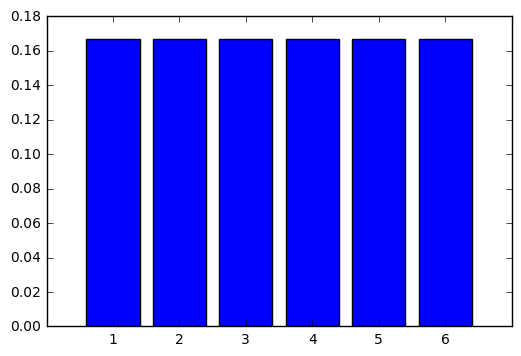

In [80]:
def plot_pmf(pmf, xlabel='x', ylabel='y'):
    """A ploting helper function to plot the pmf values."""
    x, y = list(pmf.Render())
    plt.bar(x, y, align='center')
    plt.xticks(x)
    
plot_pmf(six_sided_dice)

### The Die Problem

We have 4 die 6 sided, 8 sided, 16 sided and 20 sided. Suppose I select a die, roll it, and get a 8. What is the probability that I rolled each die ?

Objective: Calculate the probability for each dice. Given that I rolled a 8

First step, Set our belief(Prior). Lets take a uniform distribution as prior .i.e. all dices are equally probable

In [90]:
# Create a pmf object representing our belief
box = Pmf([4, 6, 8, 16, 20])
box.Print()

4 0.2
6 0.2
8 0.2
16 0.2
20 0.2


We have observed that the dice roll gave us 8.
So the second step is to update our prior, using 
        P(B|A)*P(A)
        
P(A) is our prior and P(B|A) in this case would be :-
        
        Probability of dice being the N sided die, given that we rolled a 8

Similarly we will emulate this Update for all the hypothesis/die

In [92]:
# Exercise 2.1 Calculate P(B|A)
box[4] *=
box[6] *=
box[8] *=
box[16] *=
box[20] *=

In [93]:
box.Normalize()
box.Print()

4 0.0
6 0.0
8 0.5263157894736842
16 0.2631578947368421
20 0.2105263157894737


Now, lets try out multiple dice rolls. But first to make it simpler lets break the process down into functions

In [ ]:
def likelihood():
    pass

def update(data):
    pass